In this project, we would like to receive an input frame and yield an anonymize frame (the faces in the frame should be distorted). Also, another network should be trained (preferably jointly) to recover the original frame such that the faces are visible.

[Ehsan github link (private)](https://github.com/Ehsan-Yaghoubi/Anonymizer-/blob/master/Text-%2318.png)



# Step1: Face detection: 
For face detection, we have used the tutorial at https://www.sitepoint.com/keras-face-detection-recognition/

In [1]:
!pip3 install mtcnn
!pip3 install keras_vggface

     |████████████████████████████████| 2.3MB 2.8MB/s 


>> Load an image from your Disk or downlead some images from the web using the `store_image()` function mentioned in the next cell:

In [0]:
import urllib.request

def store_image(url, local_file_name):
  with urllib.request.urlopen(url) as resource:
    with open(local_file_name, 'wb') as f:
      f.write(resource.read())
      
store_image('https://ichef.bbci.co.uk/news/320/cpsprodpb/5944/production/_107725822_55fd57ad-c509-4335-a7d2-bcc86e32be72.jpg',
            'iacocca_1.jpg')
store_image('https://www.gannett-cdn.com/presto/2019/07/03/PDTN/205798e7-9555-4245-99e1-fd300c50ce85-AP_080910055617.jpg?width=540&height=&fit=bounds&auto=webp',
            'iacocca_2.jpg')      

>> Detect faces:
For every face, a Python dictionary is returned, which contains three keys. The **box key** contains the boundary of the face within the image. It has four values: x- and y- coordinates of the top left vertex, width, and height of the rectangle containing the face. **The other keys are confidence and keypoints**. The **keypoints key** contains a dictionary containing the features of a face that were detected, along with their coordinates:

In [4]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

image = plt.imread('iacocca_1.jpg')
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

Using TensorFlow backend.












{'box': [160, 40, 35, 44], 'confidence': 0.9999798536300659, 'keypoints': {'left_eye': (172, 57), 'right_eye': (188, 57), 'nose': (182, 64), 'mouth_left': (173, 73), 'mouth_right': (187, 73)}}


>> Highlight Faces in an Image

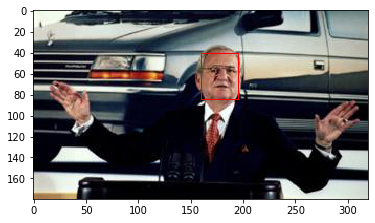

In [5]:
from matplotlib.patches import Rectangle

def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

highlight_faces('iacocca_1.jpg', faces)    

>> second image

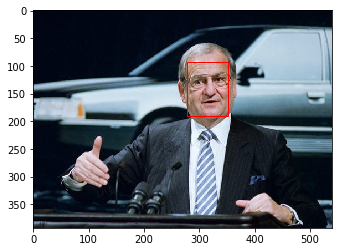

In [6]:
image = plt.imread('iacocca_2.jpg')
faces = detector.detect_faces(image)
highlight_faces('iacocca_2.jpg', faces)

>> More images

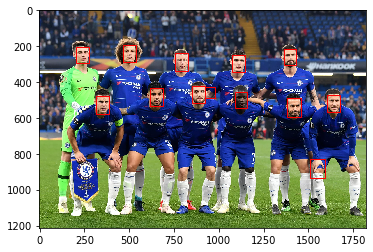

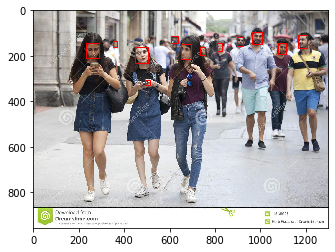

In [11]:
store_image('https://cdn.vox-cdn.com/thumbor/Ua2BXGAhneJHLQmLvj-ZzILK-Xs=/0x0:4872x3160/1820x1213/filters:focal(1877x860:2655x1638):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63613936/1143553317.jpg.5.jpg',
            'chelsea_1.jpg')
image = plt.imread('chelsea_1.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('chelsea_1.jpg', faces_staring_xi)


store_image('https://thumbs.dreamstime.com/z/istanbul-turkey-july-people-istiklal-girls-student-shorts-walking-down-street-people-istiklal-girls-student-shorts-112189508.jpg','001.jpg')
image = plt.imread('001.jpg')
faces = detector.detect_faces(image)
highlight_faces('001.jpg', faces)

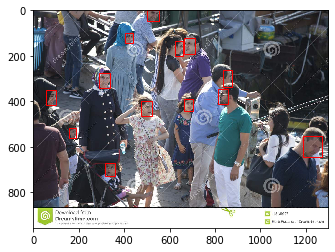

In [9]:
store_image('https://thumbs.dreamstime.com/z/istanbul-turkey-july-crowd-people-rush-hour-pier-crowd-people-rush-hour-pier-112189597.jpg','002.jpg')
image = plt.imread('002.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('002.jpg', faces_staring_xi)

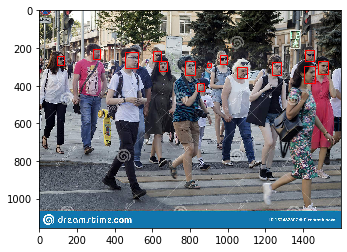

In [10]:
store_image('https://thumbs.dreamstime.com/z/crowd-people-crossing-road-traffic-lights-moscow-russia-july-152482307.jpg','003.jpg')
image = plt.imread('003.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('003.jpg', faces_staring_xi)

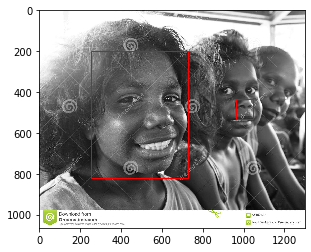

In [12]:
store_image('https://thumbs.dreamstime.com/z/tiwi-people-australia-aboriginal-bathurst-island-island-located-kilometers-darwin-s-still-not-touristic-area-51102240.jpg','004.jpg')
image = plt.imread('004.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('004.jpg', faces_staring_xi)


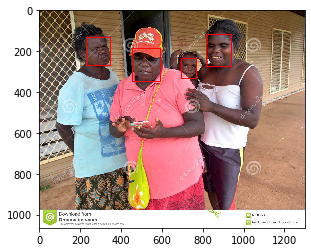

In [13]:
store_image('https://thumbs.dreamstime.com/z/tiwi-women-baby-checking-phone-little-island-australia-new-mobile-bathurst-island-60983824.jpg','005.jpg')
image = plt.imread('005.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('005.jpg', faces_staring_xi)


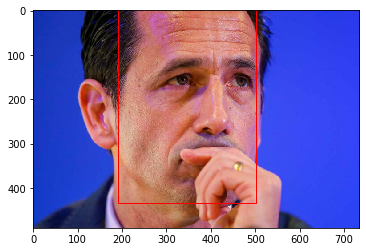

In [15]:
store_image('https://static.globalnoticias.pt/oj/image.aspx?brand=OJ&type=generate&guid=7c5eb97c-d80b-4788-81c6-723809c22cb2&w=735&h=490&t=20190504084508','006.jpg')
image = plt.imread('006.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('006.jpg', faces_staring_xi)


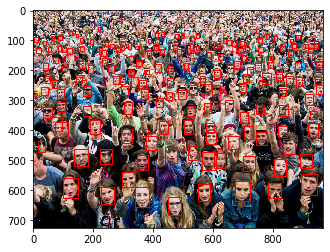

In [16]:
store_image('https://static.independent.co.uk/s3fs-public/thumbnails/image/2015/06/16/16/festival.jpg?w968','007.jpg')
image = plt.imread('007.jpg')
faces_staring_xi = detector.detect_faces(image)
highlight_faces('007.jpg', faces_staring_xi)


If you want to extract the face area and perform a recognition on them refer to the original link at https://www.sitepoint.com/keras-face-detection-recognition/


# Step 2: AutoEncoder 
This network should reconstruct the image while the face could not be detected by the face detector.

# Step 3: Reconstruction Network
This network should be able to recunstruct the faces from 